# The Vicsek model 
*by Xichen Chao, Joseph Dowling, Tom de Bruin, Arnold Gomes*



The Vicsek model is a minimal method of modelling the flocking behaviours of active particles. This project will focus on the behaviour of a flock of birds and model their movement as time passes.

We have chosen to use object oriented programming to simplify this task. We will create an object that represents an environment that we are simulating. The environment has several parameters that can be varied such as the number of birds, speed of the birds, radius of influence and so on. The benefits of the object oriented approach for our program is that all of these values can be changed without affecting other environments and new environments for testing can be generated very easily.

Regarding modules we will require, we will need to run the calculations to simulate the birds position over time. The ```numpy``` library will be best served for our purposes. We will also need to visually represent these positions. To do this, we can use a quiver plot from the ```matplotlib``` library. This will not only allow us to display the position of each bird but also the direction they are moving in. We also import ```cv2``` for video creation, ```os``` for file management and ```pandas``` for statistical analysis.

We have defined our class and functions in an additional library titled ```vicsekmodel.py```. There are comments made in this file should you wish to look at them.

In [1]:
#importing libraries
import vicsekmodel as vicsek

These are the default values that are taken for our testing environment defined within the constructor method of our class. Any variable can be changed by passing a different value within creation. 

In [2]:
sigma = 0.1 # variance of noise
N = 225 # number of individual birds
L = 15 # size of the container(L*L)
v_prey = 0.5 # the constant velocity of the birds at all time
v_pred = 0.7 # the constant velocity of the predator at all time
R = 1 # radius for birds to be influenced by other birds
R_prey = 3.5 # radius for the preys to see the predator (it is easier for the birds to see a predator than each other )
R_pred = 2.5 # field of view of predator  


We first need to create N birds inside a container. We can do this by generating uniform random x and y values that will be in a range of 0 to L, thus simulating the scenario of the birds being inside a container. 
We will also require the direction of each bird, for which we will generate a value between 0 and 2pi.

All of this information will be stored in an n-dimensional numpy array with each row containing the x position, y position and theta value for a singular bird.

In [3]:
#creating an array of N rows, 3 columns. Each row will represent 1 bird entity
bird_nopred=vicsek.Vicsek()


We want to plot these generated birds using a quiver plot. We will be plotting these birds very often so it makes sense that we have defined a function, ```quiverplot``` to plot the birds. This function takes in the string to use as the title for the plot, and will plot the current positions of the birds unless passed a specific instance.

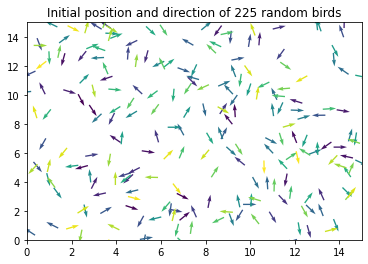

In [4]:
bird_nopred.quiverplot('Initial position and direction of {} random birds'.format(bird_nopred.N))

It is critical to have implement periodic boundary conditions. Eventually all of the birds will move out of the range of values and the plot will be empty. We have made sure that all of the x and y values stay in mod L and will illustrate that the periodic boundary conditions are working correctly.



Before state of the 0th entity: [ 2.29308584 10.04520198  5.19608159]
After state of the 0th entity: [17.29308584 25.04520198  5.19608159]


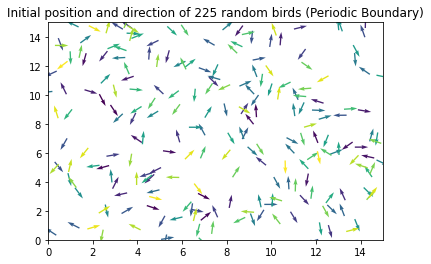

In [5]:
#adds L to the x and y values of each bird to test that they are staying in mod L
print('Before state of the 0th entity: {}'.format(bird_nopred.state[0,:]))
bird_nopred.state[:,0]+=bird_nopred.L
bird_nopred.state[:,1]+=bird_nopred.L
print('After state of the 0th entity: {}'.format(bird_nopred.state[0,:]))

bird_nopred.quiverplot('Initial position and direction of {}'.format(bird_nopred.N) + 
                       ' random birds (Periodic Boundary)')

As the plot is identical to the previous one, it means that the periodic boundary conditions are working correctly. Now that we have succeeded in creating birds and applying our periodic boundary conditions, we will move on to the behaviour of the birds

In the Vicsek Model, each particle is influenced by other particles that are within a certain proximity. At each timestep, the positions of each particle will be updated so we need to recalculate the distances between each bird and every other bird. 
We have created a function ```get_distance_matrix``` which takes in an array of the birds positions and will output a distance matrix A, with ```A[i, j] = A[j, i]``` being the direct distance between bird i and bird j.

In [6]:
initialdistancemat=bird_nopred.get_distance_matrix()
#distance between bird 1 and bird 155
print(initialdistancemat[0,154])

4.17054596693834


We will now implement the behavioural equations of birds under the Vicsek Model. We define a function ```timestep``` which receives an array of bird positions and updates their position and direction based on the Vicsek Model motion equation as follows: <br>
- $ \overrightarrow{r_i}(k+1)= \overrightarrow{r_i}(k)+\hat{n_i}v_0$
which describes the change in position of bird i <br>
- $ \theta_i(k+1)=angle[\sum_{j=1}^{z_i} \hat{n_j}]+\eta_i$

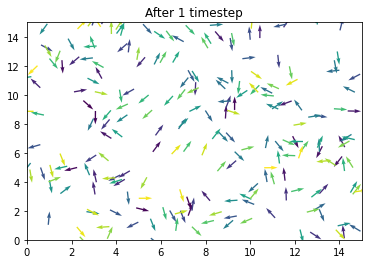

In [7]:
#Simulates one timestep
bird_nopred.timestep()
bird_nopred.quiverplot('After 1 timestep')

We will now implement the Vicsek Order parameter calculation as a function ```get_VOP()``` which takes in the current state of the systems and outputs the VOP using the formula <br>
$n=\frac{1}{N}\mid \sum_{i=1}^{z_i} \hat{n_i} \mid$

We will conduct a test whether the Vicsek model equations are increasing the VOP or not. The VOP of the system after 1 timestep is

In [8]:
#calculates the VOP of the current state
bird_nopred.get_VOP()

0.02547078683818165

This is the VOP after 1 timestep, after another timestep we should see the VOP increase meaning our equations of motion are working correctly

In [9]:
#simulates another timestep
bird_nopred.timestep()
#calculates the vop
bird_nopred.get_VOP()

0.025491363946068487

After 1 timestep we can see that the birds begin to move closer and change directions on the quiver plot, and can also see that the Vicsek Order parameter has increased. 
Now that the initial testing of our functions is complete, we can reset the positions of the birds using the ```reset``` function we have created.

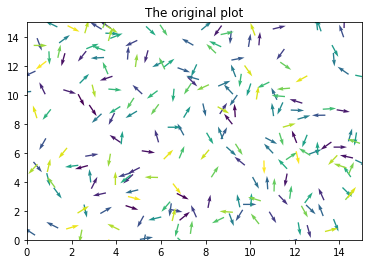

In [10]:
bird_nopred.reset()
#The plot should now look the same as the initial plot
bird_nopred.quiverplot('The original plot')

We now want to repeatedly carry out our timestep function to get many stages of our birds motion, and continuously calculate the VOP at each stage so we can analyse results. 
We defined a function called ```ntimesteps``` which takes in the number of timesteps and will execute that many timesteps of motion.

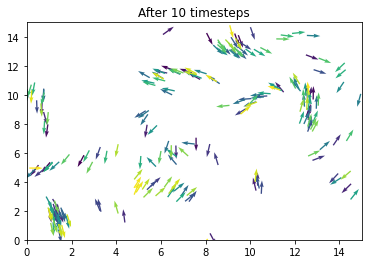

0.11144269592148522

In [11]:
#10 timesteps
bird_nopred.ntimesteps(10)
#the plot after 10 timesteps
bird_nopred.quiverplot('After 10 timesteps')
#the VOP after 10 timesteps 
bird_nopred.get_VOP()

Comparing the plot after 10 timesteps to the initial plot, we can very clearly see the grouping of the birds which is a key characteristic of the Vicsek model. We can also see the Vicsek order parameter has increased, meaning alignment of the birds has significantly improved.
We will now run the system for 500 timesteps and extract some results


In [12]:
bird_nopred.reset()
#run the system for 500 timesteps
bird_nopred.ntimesteps(500)

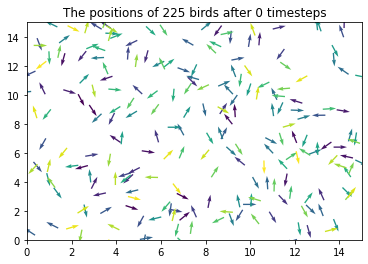

The VOP at 0 timesteps is 0.033130960545910554


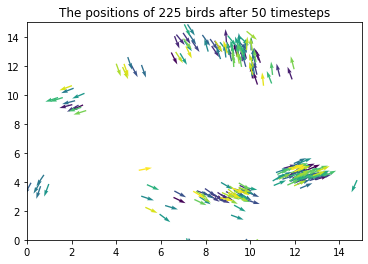

The VOP at 50 timesteps is 0.4887211047575407


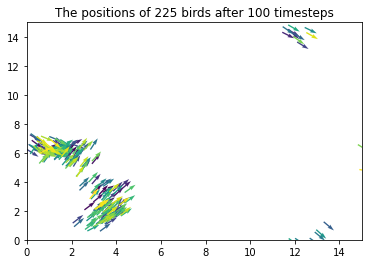

The VOP at 100 timesteps is 0.8416708380559733


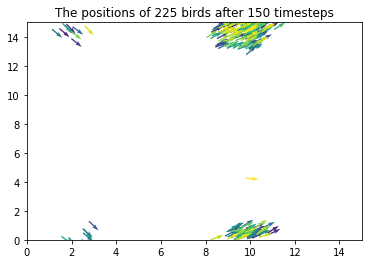

The VOP at 150 timesteps is 0.9510140347071077


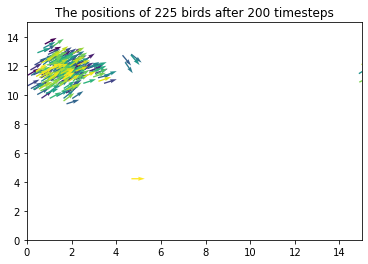

The VOP at 200 timesteps is 0.9806713946406893


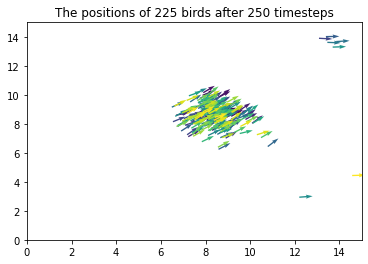

The VOP at 250 timesteps is 0.9918801323051794


In [13]:
#various plots of bird positions
for i in range(0,6):
    bird_nopred.quiverplot('The positions of {} birds after {} timesteps'.format(bird_nopred.N,i*50),bird_nopred.statehistory[i*50])
    print('The VOP at {} timesteps is {}'.format(i*50,bird_nopred.VOPhistory[i*50]))

1. As we can see in the initial plot, the birds are very scattered. 
2. After 50 timesteps, we see some clusters of birds forming moving in a similar direction to each other, but in relation to other clusters, they are moving in different directions. This also reflected by their alignment calculation, the VOP is only 0.49.
3. After 100 timesteps, there are now only 2 large clusters of birds with a few stray birds. They are almost alligned in the same direction, giving us a VOP reasonably close to 1, of 0.84.
4. After 150 timesteps, we see the same clusters of birds but with almost no stray birds. They are almost all moving in the same direction, giving us a VOP of of 0.95.
5. After 200 timesteps, there are very few changes to the system, apart from a few birds veering off course every now and then. These birds eventually rejoin the clusters. We theorise this misallignment is caused by the noise parameter, as it causes them to change direction so there are no longer any birds in close proximity.

Now to illistrate the effects of the envioment perameters we will run a new simulation with altered values

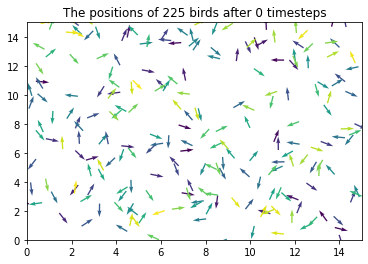

The VOP at 0 timesteps is 0.05967131980715251


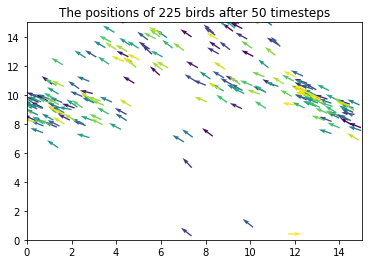

The VOP at 50 timesteps is 0.983697745768036


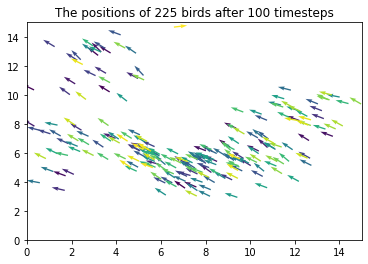

The VOP at 100 timesteps is 0.9849314622491372


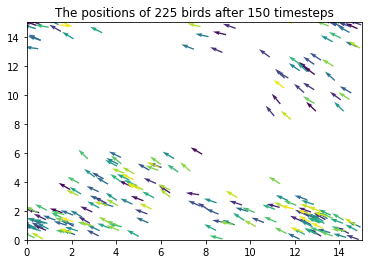

The VOP at 150 timesteps is 0.9818389836281628


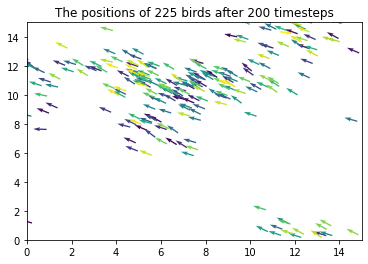

The VOP at 200 timesteps is 0.9855852211406755


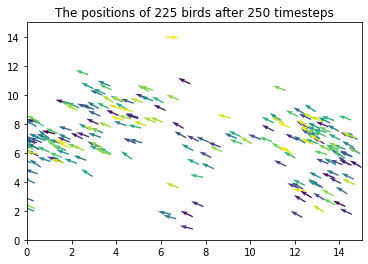

The VOP at 250 timesteps is 0.9867469556087831


In [14]:
#Creates a new enviorment where birds have an increased radius of sight to one another
bird_nopred2 = vicsek.Vicsek(R = 2)
bird_nopred2.ntimesteps(500)

#various plots of bird positions
for i in range(0,6):
    bird_nopred2.quiverplot('The positions of {} birds after {} timesteps'.format(bird_nopred2.N,i*50),bird_nopred2.statehistory[i*50])
    print('The VOP at {} timesteps is {}'.format(i*50,bird_nopred2.VOPhistory[i*50]))

Here we increased the radius ```R``` for which birds interact with other birds. As you can see it, the birds all conform to the same direction much faster but has caused the system to inhbit far less clumping.

# Movie Creation

At each timestep, we can create a plot of the birds positions and by compiling all of these plots, create a video illustrating the movements of the birds over time. We created the function ```makevideo``` for this and will attach videos of several different environments we will simulate. Here are two basic examples of creating a video using our earlier created simulations.

In [15]:
#change this as desired
filepath = '/home/randa/Documents/Code/The-Vicsek-model-master/CSVs/'

In [16]:
title =  '{} birds simulated'.format(bird_nopred.N)
bird_nopred.makevideo(filepath,12,title)

title2 =  '{} birds with R = {}'.format(bird_nopred2.N,bird_nopred2.R)
bird_nopred2.makevideo(filepath,12,title2)

# Analysis of VOP over time

Now that we are able to simulate the bird's environment for a large amount of timesteps, we will be able to analyse the change in the Vicsek Order parameter over time. 

Simply by observing the multiple quiver plots and watching the videos, we can see that the bird's alignment with each other improves over time until they are all moving as one large unit. At this point in time, the system stabilises and the VOP will only experience minor variations.

We have written a function to extract the VOP at each timestep and export this as a CSV file for analysis.


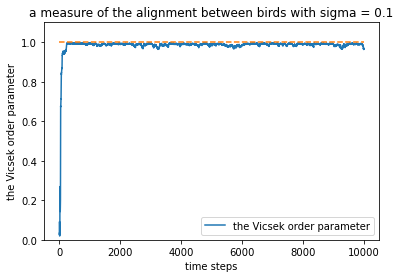

In [17]:
bird_nopred.reset()
bird_nopred.ntimesteps(10000)
bird_nopred.plotvopovertime()

This is a plot of the Vicsek order parameter for the 10,000 timesteps. As you can see, the system reached a steady state at roughly 100-200 timesteps, and the VOP only experiences minor fluctations past 500. These fluctations are caused by the effect of the noise on the birds movements.

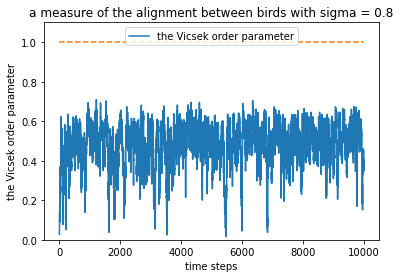

In [18]:
bird_nopred3 = vicsek.Vicsek(sigma=0.8)
bird_nopred3.ntimesteps(10000)
bird_nopred3.plotvopovertime()

Here is another plot of the VOP for 10,000 timesteps, this time with a much higher sigma value of 0.8. This time we see a much lower mean value additionally with much higher variation caused by the high noise perameter (sigma).

We will explore the effect that the noise parameter sigma has on the Vicsek order parameter once the system has reached a steady state. We hypothesise that with larger values of sigma, the increased noise will cause the birds alignment to stabilise at a lower VOP value. There will also be larger fluctations in the VOP due to the randomness of the noise 

The way we will carry out this test is to run the system for 10000 timesteps for several values of sigma, save the VOP values for each scenario in separate CSV files, then read and plot them against each other and draw conclusions.

We will test 20 values of sigma between 0 and 1. As we see from the graphs above, the VOP for a single system as time increases they have an 'average' value. So for each scenario that we are simulating, our function will determine when the system reaches a stable VOP and then discard all values prior to this stage before plotting them.

With the excess values discarded, we will take the standard deviation of the leftover VOPs and plot them as error bars so we can draw better conclusions about the data.


for sigma = 0.05 we found t = 226
for sigma = 0.1 we found t = 275
for sigma = 0.15 we found t = 148
for sigma = 0.2 we found t = 144
for sigma = 0.25 we found t = 135
for sigma = 0.3 we found t = 85
for sigma = 0.35 we found t = 159
for sigma = 0.39999999999999997 we found t = 64
for sigma = 0.44999999999999996 we found t = 80
for sigma = 0.49999999999999994 we found t = 40
for sigma = 0.5499999999999999 we found t = 95
for sigma = 0.6 we found t = 45
for sigma = 0.65 we found t = 67
for sigma = 0.7 we found t = 54
for sigma = 0.75 we found t = 25
for sigma = 0.7999999999999999 we found t = 50
for sigma = 0.85 we found t = 46
for sigma = 0.9 we found t = 40
for sigma = 0.95 we found t = 20
for sigma = 1.0 we found t = 164


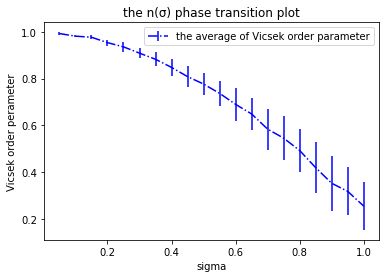

In [19]:
#creates a list of 20 sigma values we will test.
sigmalist=vicsek.np.linspace(0.05,1,20)

#takes in an object and simulates 10000 timesteps for each sigma value in sigmalist, saving each scenario's VOP
#as a csv in the selected folder

csvFilepaths = vicsek.VOPcsv(bird_nopred,10000,filepath,sigmalist)

#reads the created csvs and plots a graph of the mean VOP value through time while varying sigma
vicsek.VOPplotfromCSVs(csvFilepaths,sigmalist)

We can see from this plot that as sigma increases, the average VOP decreases. This means that as the noise is increased, the birds alignment is more disturbed causing them to have a limit to how well alligned they can be. This leads to a lower average VOP once the system has steadied.

We also observe that as sigma increases, the standard deviation of each average VOP increases as illustrated by the error bars. This makes sense as the larger the noise, due to the randomness it causes the VOP to fluctuate more even after it has stabilised.

# Addition of a predator

Now that we have modelled a basic system of birds, we will add a predator. The idea of the predator is it will act as a particle that will orient itself to chase after birds within it's radius of sight. The birds behaviour will be modified and they will attempt to escape the predator when it enters their radius of sight.

The formulas of motion will now be changed due to the addition of a predator. <br>
The prey will continue to move normally until the predator comes into their vision, where the equation changes to.
- $ \theta_i(k+1)=\frac{(\theta_i(k)-\theta_{topred}) \times d_{topred}}{R_{pred}}+\theta_{topred}$ <br>
Where $\theta_{topred}$ and $d_{topred}$ represent the angle and distance between bird i and the predator respectively. $R_{pred}$ represents the radius of sight of the predator.

The predator also has a formula for it's direction that will take into account the positions of nearby birds <br>
- $\theta_{pred}(k+1)=average(\sum{}{} \theta_{close})$ <br>
Where $\theta_{close}$ is the directions of all birds in the predator's sight. 
This formula is very simple, it simply makes the predator move in the average direction of birds that are in close proximity, hence 'giving chase'.

Because of the way we have defined the class, we can create a new object and by editing a parameter ```predator=True```, we can create a new environment where there is a predator also created.

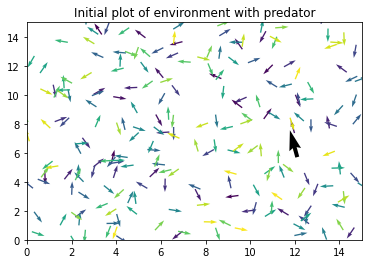

In [20]:
#creating an environment with a predator
bird_withpred=vicsek.Vicsek(predator=True)
#initial plot with predator
bird_withpred.quiverplot('Initial plot of environment with predator')

We will now show the same system 1 timestep into the future

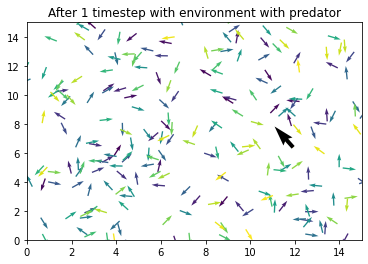

In [21]:
bird_withpred.timestep()
bird_withpred.quiverplot('After 1 timestep with environment with predator')

We can see that after 1 timestep, the predator is facing nearby birds and these birds are attempting to move away from the predator. We will run the system for 500 timesteps and extract some results

In [22]:
bird_withpred.reset()
#500 timesteps of motion simulated
bird_withpred.ntimesteps(500)


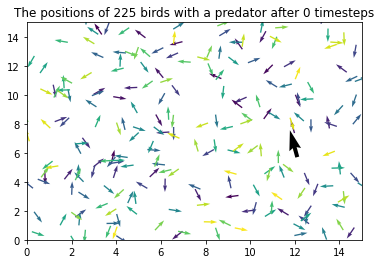

The VOP at 0 timesteps is 0.05046769377133623


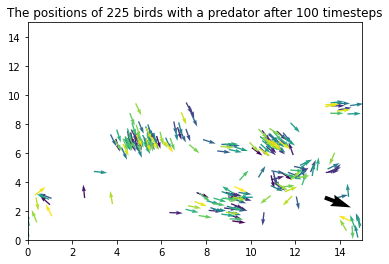

The VOP at 50 timesteps is 0.4204400859224748


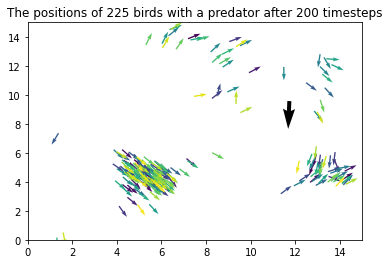

The VOP at 100 timesteps is 0.651705551491821


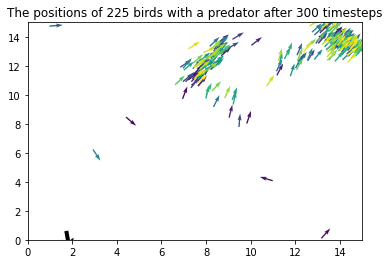

The VOP at 150 timesteps is 0.7192813606569327


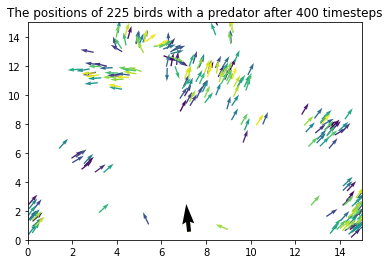

The VOP at 200 timesteps is 0.8013671548826015


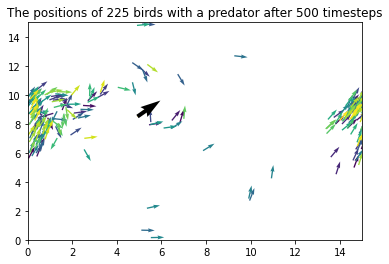

The VOP at 250 timesteps is 0.9261098353961414


In [23]:
#various plots of predator environment
for i in range(0,6):
    bird_withpred.quiverplot('The positions of {} birds with a predator after {} timesteps'.format(bird_withpred.N-1,i*100),bird_withpred.statehistory[i*100])
    print('The VOP at {} timesteps is {}'.format(i*50,bird_withpred.VOPhistory[i*50]))

As we can see from the plots, as time increases, the prey begin to group up as normal behaviour is taking place but the existence of the predator causes them to scatter to avoid it, leading to heavy misallignment and inconsistent grouping. We can also observe that the predator is orienting itself towards nearby groups of preys as it should be doing.

We will plot a graph of the Vicsek order parameter over time to show that with the existence of a predator, due to the nature of it's behaviour, means that the system will never reach a steady state and there will be very large fluctuations in the VOP. 

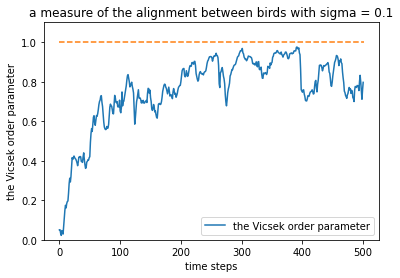

In [24]:
bird_withpred.plotvopovertime()

We can also a video illustrating the dynamics of the predator-prey environment with our ```makevideo``` function.

In [25]:
#creating a 12 fps video
title3 = 'birds with predator'

bird_withpred.makevideo(filepath,12,title3)